<a href="https://colab.research.google.com/github/vlasova-us/Python_public/blob/main/%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D0%B5%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_%D0%BA_%D0%BB%D0%B5%D0%BA%D1%86%D0%B8%D0%B8_%C2%AB%D0%9A%D0%BE%D1%80%D1%80%D0%B5%D0%BB%D1%8F%D1%86%D0%B8%D1%8F_%D0%B8_%D0%BA%D0%BE%D1%80%D1%80%D0%B5%D0%BB%D1%8F%D1%86%D0%B8%D0%BE%D0%BD%D0%BD%D1%8B%D0%B9_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7%C2%BB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Возьмите датасет Mortality and Water Hardness**
www.kaggle.com...r-hardness

В этом датасете содержатся данные по средней годовой смертности на
100000 населения и концентрации кальция в питьевой воде для 61
большого города в Англии и Уэльсе. Города дополнительно поделены на
северные и южные.

Задание 1.
Ответить на вопрос: есть ли связь между жёсткостью воды и средней годовой смертностью?

- Построить точечный график

- Рассчитать коэффициенты корреляции Пирсона и Спирмена

- Построить модель линейной регрессии

- Рассчитать коэффициент детерминации

- Вывести график остатков

Задание 2.
Ответить на вопрос: сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?
- Разделить данные на 2 группы

- Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from pylab import rcParams
rcParams['figure.figsize'] = 11,7

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv ('/content/drive/MyDrive/Data/water.csv', sep = ',')
data.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


Text(0.5, 1.0, 'Соотношение жесткости воды и смертности')

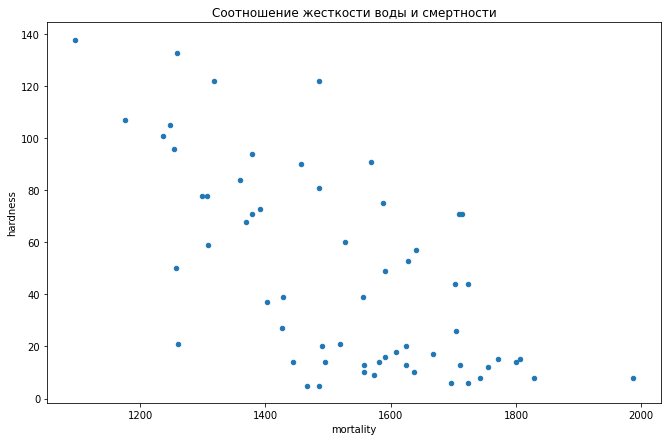

In [ ]:
# Соотношение жесткости воды и смертности
data.plot(kind='scatter', x='mortality', y='hardness')
plt.title('Соотношение жесткости воды и смертности')

In [ ]:
# коэффициент корреляции Пирсона
data[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


In [ ]:
# коэффициент корреляции Спирмена
data[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


In [ ]:
# модель линейной регрессии
X = data[['hardness']]
y = data['mortality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
X_train.shape, X_test.shape, y_train.shape

((42, 1), (19, 1), (42,))

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
model.coef_

array([-3.13167087])

In [ ]:
model.intercept_

1668.9722977277095

In [ ]:
# предсказание на тестовых данных
y_pred = model.predict(X_test)
y_pred

array([1340.14685615, 1637.65558901, 1625.12890552, 1531.17877935,
       1424.7019697 , 1606.33888028, 1252.46007173, 1434.09698232,
       1603.20720941, 1650.18227249, 1484.20371627, 1415.30695708,
       1546.83713371, 1625.12890552, 1446.62366581, 1546.83713371,
       1637.65558901, 1621.99723465, 1352.67353964])

In [ ]:
y_test

0     1247
5     1558
46    1495
31    1702
13    1307
55    1625
34    1259
49    1587
12    1519
40    1696
33    1309
59    1485
16    1555
3     1800
53    1709
17    1428
8     1637
6     1807
41    1236
Name: mortality, dtype: int64

In [ ]:
# значение коэффициента детерминации
model.score(X_test, y_test) 

0.5046490611017092

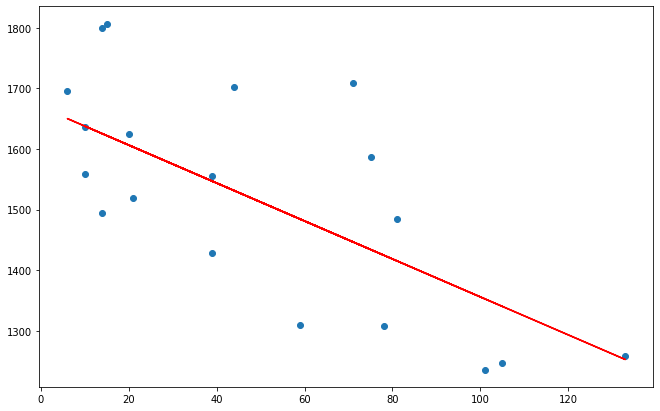

In [ ]:
plt.scatter(X_test, y_test)
plt.plot(X_test , y_pred, c='r')

Text(0, 0.5, 'mortality')

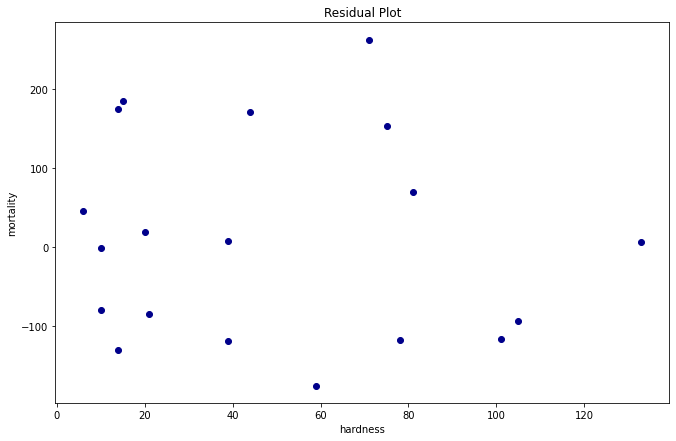

In [ ]:
# Диаграмма остатков
residuals = y_test-y_pred
plt.plot(X_test, residuals, 'o' ,color='darkblue')
plt.title("Residual Plot")
plt.xlabel("hardness")
plt.ylabel("mortality")


In [ ]:
#датасет разделен на южные и северные города
data_south = data.loc[data['location'] =='South']
data_north = data.loc[data['location'] =='North']

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


Text(0.5, 1.0, 'Соотношение жесткости воды и смертности для южных городов')

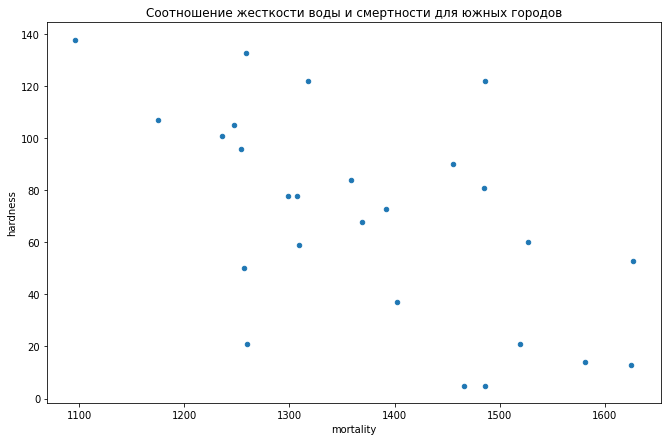

In [ ]:
# Соотношение жесткости воды и смертности для южных городов
data_south.plot(kind='scatter', x='mortality', y='hardness')
plt.title('Соотношение жесткости воды и смертности для южных городов')

In [ ]:
# коэффициент корреляции Пирсона для южных городов. Всего .жных городов 26, а для расчета коэфф.Пирсона объем выборки должен быть больше либо равен 30. При 26 наблюдениях результат коэф-та очень приблизительный
data_south[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.602153
hardness,-0.602153,1.000000


In [ ]:
# коэффициент корреляции Спирмена для южных городов
data_south[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.595723
hardness,-0.595723,1.000000


In [ ]:
# модель линейной регрессии для южных городов
X_south = data_south[['hardness']]
y_south = data_south['mortality']

X_south_train, X_south_test, y_south_train, y_south_test = train_test_split(X_south, y_south, test_size=0.30, random_state=12)
X_south_train.shape, X_south_test.shape, y_south_train.shape

((18, 1), (8, 1), (18,))

In [ ]:
model_south = LinearRegression()
model_south.fit(X_south_train, y_south_train)

LinearRegression()

In [ ]:
model_south.coef_

array([-2.15673145])

In [ ]:
model_south.intercept_

1544.933804334314

In [ ]:
# предсказание на тестовых данных по южным городам
y_south_pred = model_south.predict(X_south_test)
y_south_pred

array([1437.09723201, 1337.88758546, 1398.27606597, 1534.1501471 ,
       1314.16353955, 1281.81256785, 1387.49240873, 1258.08852194])

In [ ]:
y_south_test

48    1257
14    1254
47    1369
2     1466
37    1175
18    1318
10    1392
34    1259
Name: mortality, dtype: int64

In [ ]:
# значение коэффициента детерминации для южных городов
model_south.score(X_south_test, y_south_test) 

-0.07019385655750265

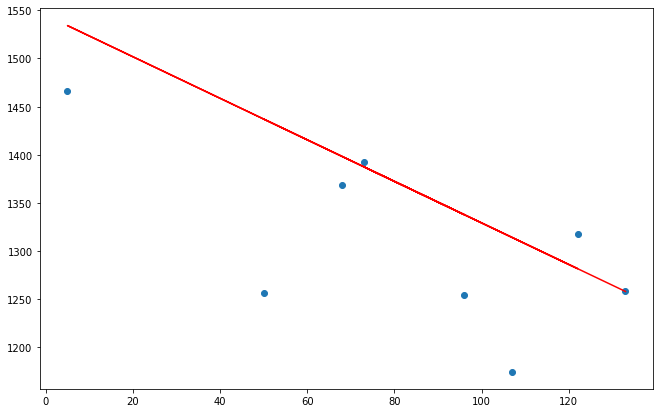

In [ ]:
plt.scatter(X_south_test, y_south_test)
plt.plot(X_south_test , y_south_pred, c='r')

Text(0, 0.5, 'mortality')

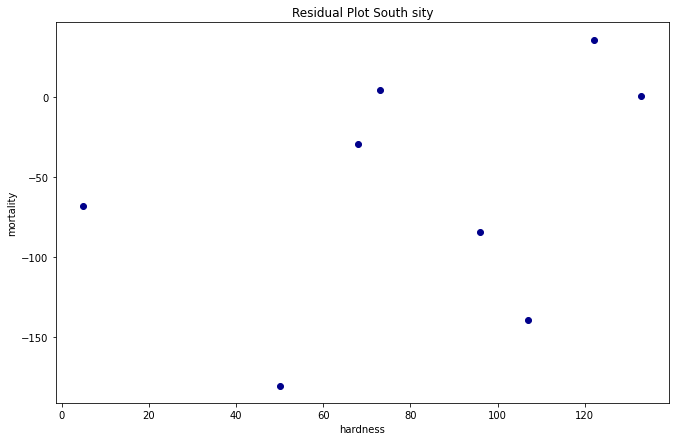

In [ ]:
# Диаграмма остатков для южных городов
residuals_south = y_south_test-y_south_pred
plt.plot(X_south_test, residuals_south, 'o' ,color='darkblue')
plt.title("Residual Plot South sity")
plt.xlabel("hardness")
plt.ylabel("mortality")

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


Text(0.5, 1.0, 'Соотношение жесткости воды и смертности для северных городов')

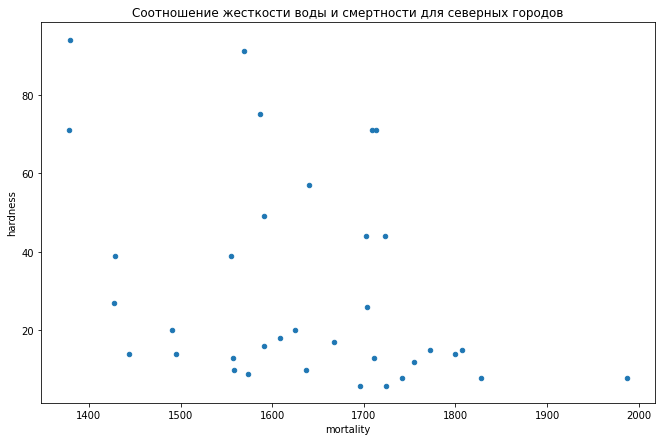

In [ ]:
# Соотношение жесткости воды и смертности для северных городов
data_north.plot(kind='scatter', x='mortality', y='hardness')
plt.title('Соотношение жесткости воды и смертности для северных городов')

In [ ]:
# коэффициент корреляции Пирсона для северных городов
data_north[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.368598
hardness,-0.368598,1.000000


In [ ]:
# коэффициент корреляции Спирмена для северных городов
data_north[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.404208
hardness,-0.404208,1.000000


In [ ]:
# модель линейной регрессии для северных городов
X = data_north[['hardness']]
y = data_north['mortality']

X_train_north, X_test_north, y_train_north, y_test_north = train_test_split(X, y, test_size=0.30, random_state=42)
X_train_north.shape, X_test_north.shape, y_train_north.shape

((24, 1), (11, 1), (24,))

In [ ]:
model_north = LinearRegression()
model_north.fit(X_train_north, y_train_north)

LinearRegression()

In [ ]:
model_north.coef_

array([-1.97686226])

In [ ]:
model_north.intercept_

1688.150229031281

In [ ]:
# предсказание на тестовых данных по северным городам
y_north_pred = model_north.predict(X_test_north)
y_north_pred

array([1672.33533095, 1670.35846869, 1660.47415739, 1676.28905547,
       1656.52043287, 1547.79300857, 1601.16828959, 1672.33533095,
       1611.05260089, 1658.49729513, 1611.05260089])

In [ ]:
y_test_north

45    1987
23    1574
43    1444
36    1724
26    1591
50    1713
31    1702
22    1742
16    1555
28    1772
17    1428
Name: mortality, dtype: int64

In [ ]:
# значение коэффициента детерминации для северных городов
model_north.score(X_test_north, y_test_north) 

0.018885304285745863

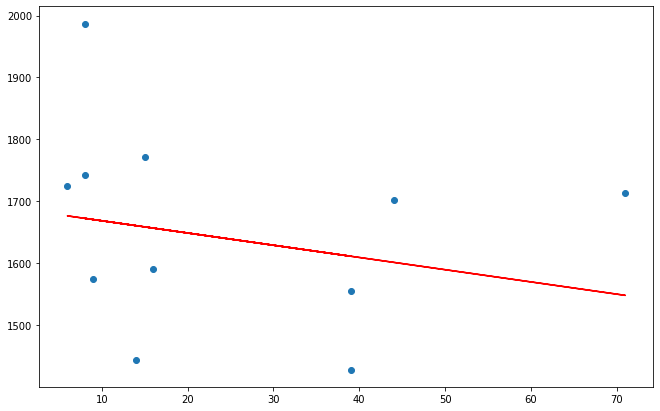

In [ ]:
plt.scatter(X_test_north, y_test_north)
plt.plot(X_test_north, y_north_pred, c='r')

Text(0, 0.5, 'mortality')

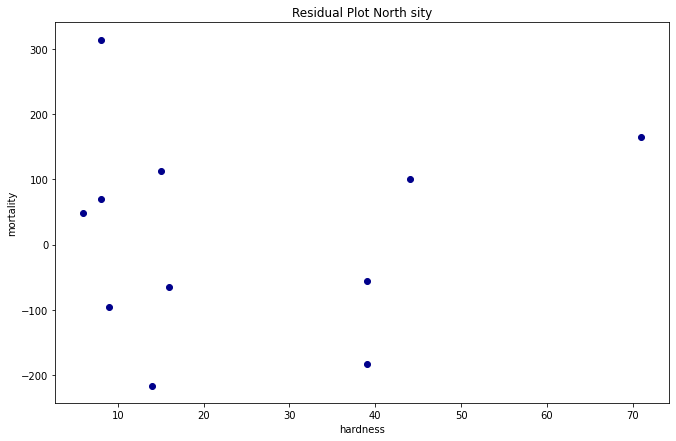

In [ ]:
# Диаграмма остатков для северных городов
residuals_north = y_test_north-y_north_pred
plt.plot(X_test_north, residuals_north, 'o' ,color='darkblue')
plt.title("Residual Plot North sity")
plt.xlabel("hardness")
plt.ylabel("mortality")